<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoan_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [876]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
#this code sets the font size globaly for matplotlib
plt.rcParams.update({'font.size': 18})

linear_example=pd.DataFrame()
linear_example["x1"]=[0.5,0.4,0.4,0.6,0.6,1.5,1.4,1.4,1.6,1.6]
linear_example["x2"]=[0.5,0.4,0.6,0.4,0.6,1.5,1.4,1.6,1.4,1.6]
linear_example["y"]=[1,1,1,1,1,-1,-1,-1,-1,-1]
linear_example




,x1,x2,y
0,0.5,0.5,1
1,0.4,0.4,1
2,0.4,0.6,1
3,0.6,0.4,1
4,0.6,0.6,1
5,1.5,1.5,-1
6,1.4,1.4,-1
7,1.4,1.6,-1
8,1.6,1.4,-1
9,1.6,1.6,-1


In [877]:
linear_example["x0"]=1
linear_example[['x0','x1','x2','y']]

,x0,x1,x2,y
0,1,0.5,0.5,1
1,1,0.4,0.4,1
2,1,0.4,0.6,1
3,1,0.6,0.4,1
4,1,0.6,0.6,1
5,1,1.5,1.5,-1
6,1,1.4,1.4,-1
7,1,1.4,1.6,-1
8,1,1.6,1.4,-1
9,1,1.6,1.6,-1


In [878]:
len(linear_example. columns) 


4

In [879]:
# Weight initialization, normally choose close to 0
w=[]
for i in range(0,len(linear_example. columns)-1 ):
  w.append(random.random())
w

[0.21277380559218395, 0.5380408430565278, 0.6299682802652835]

In [880]:
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  x2=(-w[0]-w[1]*x1)/w[2]
  return  x2

In [881]:
x1=linear_example['x1']

In [882]:
Fx2(x1)

0   -0.764791
1   -0.679384
2   -0.679384
3   -0.850199
4   -0.850199
5   -1.618867
6   -1.533460
7   -1.533460
8   -1.704275
9   -1.704275
Name: x1, dtype: float64

In [883]:
def draw(linear_example):
  fig, (ax1) = plt.subplots(1, figsize=(4, 10))
  ax1.scatter(    linear_example[linear_example["y"]==1]['x1'], 
                  linear_example[linear_example["y"]==1]["x2"], 
                  s=100,
                  c = "green", 
                  marker = "+")
  ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                  linear_example[linear_example["y"]==-1]["x2"], 
                  s=100,
                  c = "orange", 
                  marker = "_")
  ax1.set_xlim(0,2)
  ax1.set_ylim(-4,4)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.grid(True)
  x1 = np.linspace(0, 2, 1000)
  ax1.plot(x1, Fx2(x1));
  plt.show()

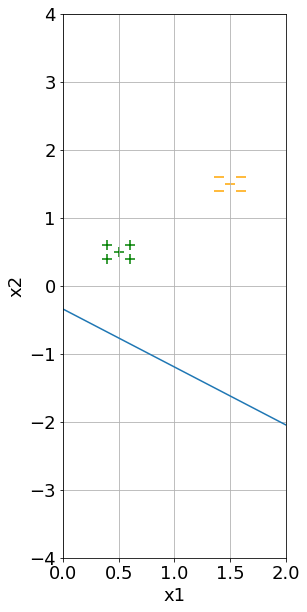

In [884]:
draw(linear_example)

In [885]:
def update_w( w,learning_rate,num):
  y=linear_example['y'].to_numpy()
  y_predict=np.sign(np.dot(linear_example[["x0","x1","x2"]].to_numpy(),w))
  X=linear_example[["x0","x1","x2"]].to_numpy()
  error=y-y_predict
  
  
  for i in range(num):
    if error.sum()!=0:
      w+=np.dot(learning_rate*error,X)
      y_predict=np.sign(np.dot(linear_example[["x0","x1","x2"]].to_numpy(),w))
      error=y-y_predict
      print(error.sum())
  return w
      
  
      
  
  

  



In [886]:
update_w(w,.01,100)

-10.0
-10.0
-10.0
10.0
0.0


array([-0.08722619, -0.01195916,  0.07996828])

In [887]:
w=update_w(w,.01,100)
w

-10.0
-10.0
-10.0
10.0
0.0


array([-0.08722619, -0.01195916,  0.07996828])

In [888]:
Fx2(x1)

0    1.165534
1    1.150579
2    1.150579
3    1.180489
4    1.180489
5    1.315083
6    1.300128
7    1.300128
8    1.330038
9    1.330038
Name: x1, dtype: float64

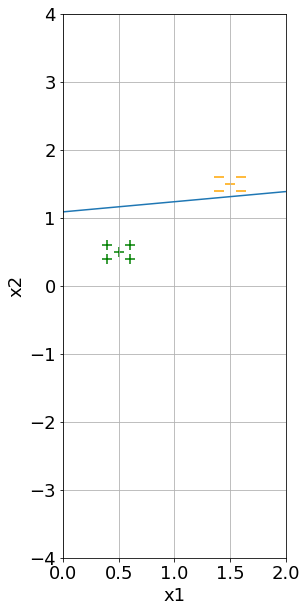

In [889]:
draw(linear_example)